## Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## Data Loading

In [2]:
df=pd.read_csv("Country-data.csv")
#https://drive.google.com/file/d/1C5Gb987zm3zAXALU7pzph-FK7tQ2Os3L/view?usp=drive_link

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [5]:
df["country"].nunique()

167

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
## Problem Statement
## Here we need to categorise the countries on the basis of their socio-economical indicators

- Developed Country
- Developing Country
- Underdeveloped Country

In [8]:
## As there is no target variable, it is an unsupervised learning problem, hence we can use 
## k-means clustering

## Missing Value Check

In [9]:
df.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Pre-Processing

In [10]:
# Calculating the absolute values of these columns
df["exports"]=df["exports"]*df["gdpp"]/100
df["imports"]=df["imports"]*df["gdpp"]/100
df["health"]=df["health"]*df["gdpp"]/100

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [12]:
## Dropping the Country Column
df1=df.drop("country",axis=1)

In [13]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Scaling (Mandatory)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1_scaled=scaler.fit_transform(df1)

In [15]:
df1_scaled

array([[4.26484907e-01, 2.95093321e-04, 3.36341972e-03, ...,
        4.75345168e-01, 7.36593060e-01, 3.07342821e-03],
       [6.81596884e-02, 6.22655666e-03, 2.94856458e-02, ...,
        8.71794872e-01, 7.88643533e-02, 3.68334145e-02],
       [1.20253165e-01, 9.31468360e-03, 2.00167874e-02, ...,
        8.75739645e-01, 2.74447950e-01, 4.03649935e-02],
       ...,
       [1.00778968e-01, 5.12723048e-03, 8.87582515e-03, ...,
        8.08678501e-01, 1.26182965e-01, 1.02988479e-02],
       [2.61441091e-01, 2.13292722e-03, 6.36206303e-03, ...,
        6.98224852e-01, 5.55205047e-01, 1.02988479e-02],
       [3.91918208e-01, 2.93402035e-03, 8.45852168e-03, ...,
        3.92504931e-01, 6.70347003e-01, 1.17305692e-02]])

## Modelling

In [16]:
from sklearn.cluster import KMeans

In [17]:
k=3

In [18]:
kmeans=KMeans(n_clusters=k)
kmeans.fit(df1_scaled)

KMeans(n_clusters=3)

In [19]:
output=kmeans.predict(df1_scaled)

In [20]:
output

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [21]:
# adding back to original dataset
df["cluster"]=output

In [22]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


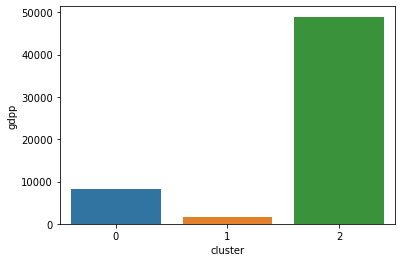

In [23]:
sns.barplot(x=df["cluster"],y=df["gdpp"],ci=None)
plt.show()
#2--> Developed Country
#1--> Under-Developed Country
#0--> Developing Country

In [24]:
df["cluster"]=df["cluster"].map({1:"Under Developed",2:"Developed",0:"Developing"})

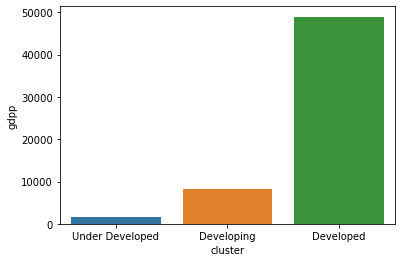

In [27]:
sns.barplot(x=df["cluster"],y=df["gdpp"],ci=None)
plt.show()

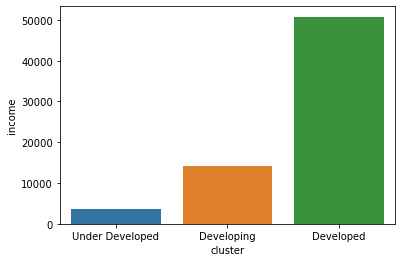

In [28]:
sns.barplot(x=df["cluster"],y=df["income"],ci=None)
plt.show()

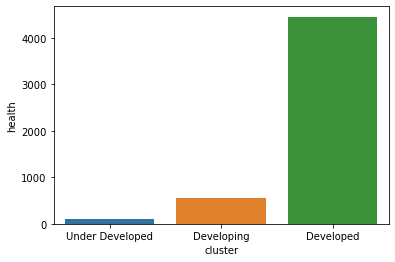

In [29]:
sns.barplot(x=df["cluster"],y=df["health"],ci=None)
plt.show()

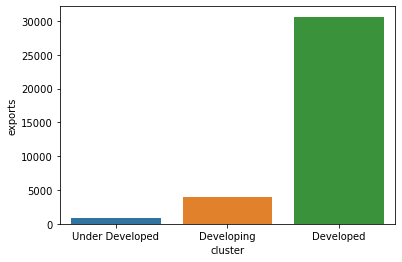

In [30]:
sns.barplot(x=df["cluster"],y=df["exports"],ci=None)
plt.show()

----------- child_mort Vs Clusters --------------------------


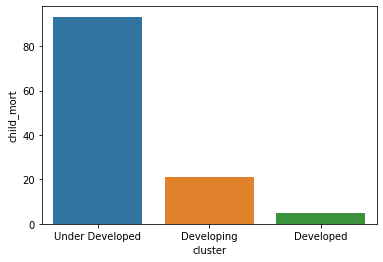

----------- exports Vs Clusters --------------------------


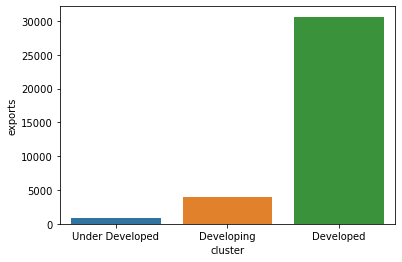

----------- health Vs Clusters --------------------------


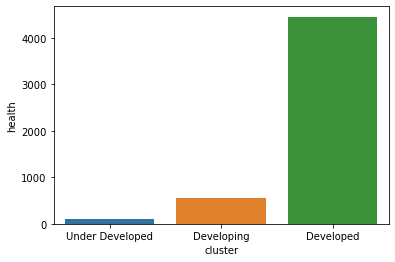

----------- imports Vs Clusters --------------------------


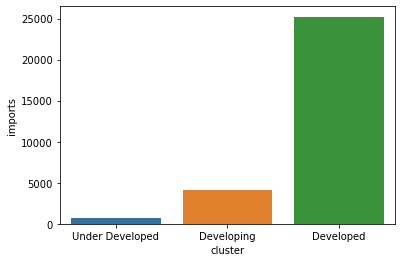

----------- income Vs Clusters --------------------------


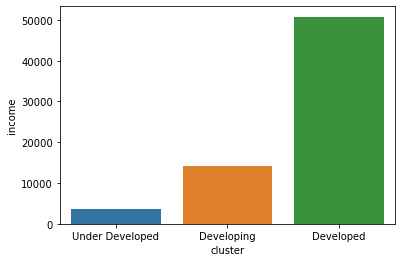

----------- inflation Vs Clusters --------------------------


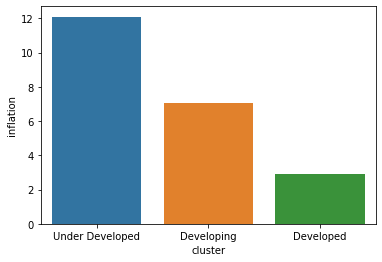

----------- life_expec Vs Clusters --------------------------


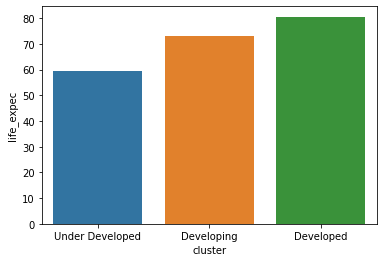

----------- total_fer Vs Clusters --------------------------


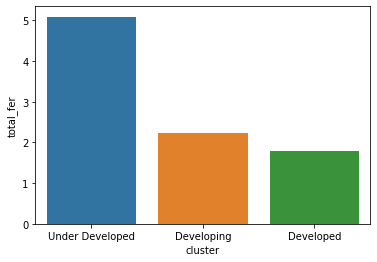

----------- gdpp Vs Clusters --------------------------


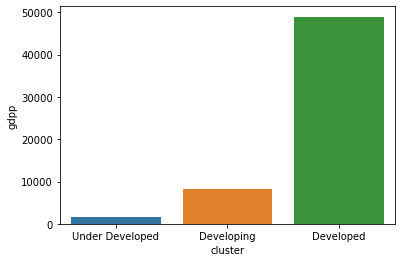

In [31]:
for i in df1.columns:
    print("-----------",i,"Vs Clusters","--------------------------")
    sns.barplot(x=df["cluster"],y=df[i],ci=None)
    plt.show()

In [32]:
list(df[df["cluster"]=="Developed"]["country"])

['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Qatar',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [33]:
list(df[df["cluster"]=="Under Developed"]["country"])

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [34]:
list(df[df["cluster"]=="Developing"]["country"])

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Rep